In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

In [21]:
df = pd.read_csv('creditcard.csv')
X = df.drop('Class', axis=1)
y = df['Class']

In [22]:
pipeline = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('log_reg', LogisticRegression(random_state=42))
])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
param_grid = {
    'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'log_reg__solver': ['liblinear', 'lbfgs']
}

In [16]:
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='f1', verbose=1, n_jobs=-1)



In [17]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('smote', SMOTE(random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(random_state=42))]),
             n_jobs=-1,
             param_grid={'log_reg__C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'log_reg__solver': ['liblinear', 'lbfgs']},
             scoring='f1', verbose=1)

In [25]:

print("Best Parameters:", grid_search.best_params_)
print("Best Score (F1):", grid_search.best_score_)

best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

print("Logistic Regression Performance:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")

Best Parameters: {'log_reg__C': 0.001, 'log_reg__solver': 'lbfgs'}
Best Score (F1): 0.1172596212339309
Logistic Regression Performance:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.07      0.92      0.13        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.56     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
 [[55626  1238]
 [    8    90]]
Precision: 0.0678
Recall: 0.9184
F1 Score: 0.1262


Cross-Validation F1 Scores: [0.0493477  0.16605166 0.09491525 0.08801956 0.20731707]
Mean Cross-Validation F1 Score: 0.1211


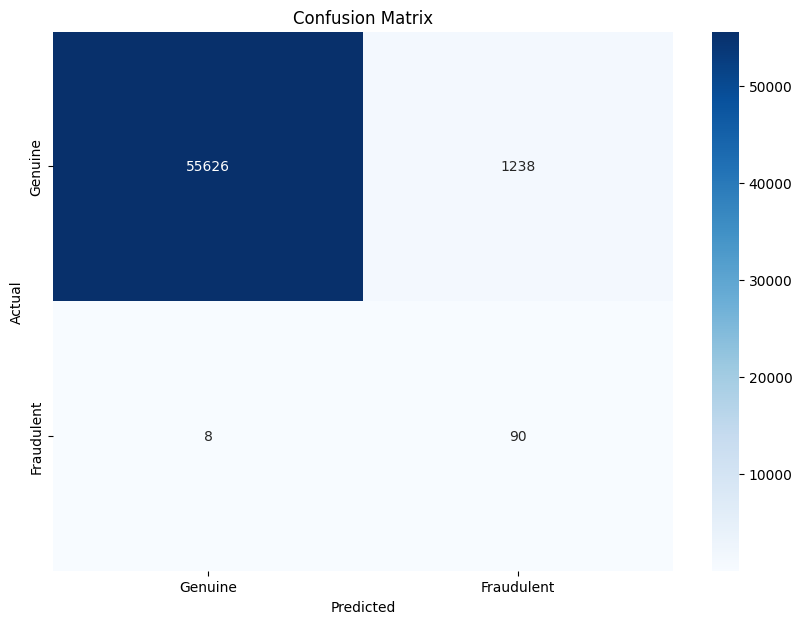

In [26]:
cv_scores = cross_val_score(best_pipeline, X, y, cv=5, scoring='f1')
print(f"Cross-Validation F1 Scores: {cv_scores}")
print(f"Mean Cross-Validation F1 Score: {cv_scores.mean():.4f}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Genuine', 'Fraudulent'], 
            yticklabels=['Genuine', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()